# TAREA ESTADÍSTICA (Hao)

## Ejercicio 1

**Una de las enfermedades que más preocupa a las autoridades sanitarias es 
la hipertensión. La hipertensión arterial afecta más del 30% de la población 
adulta mundial y es el principal factor de riesgo de padecer enfermedades 
cardiovasculares. Por ello, la lucha contra esta enfermedad es objetivo de 
los sistemas sanitarios de todo el mundo. 
En un laboratorio europeo se está trabajando en un medicamento innovador 
con cierta composición de etanol para reducir la presión arterial alta 
(sistólica). El medicamento se suministra a 100 pacientes de diferentes 
edades por vía oral en forma de comprimido. Para obtener mejores 
conclusiones en el estudio, se divide a las 100 personas en dos grupos, grupo 
1 (pacientes con edad igual o inferior a 35 años) y grupo 2 (pacientes con 
edad superior a 35 años). En la hoja de cálculo Excel llamada “HIPERTENSIÓN 
“aparecen los datos de las 100 personas que se han empleado en el estudio. 
En la primera columna aparece la edad del paciente, en la segunda columna 
aparece la presión sistólica antes de la ingestión del medicamento y en la 
tercera columna aparece indicado el valor de la presión sistólica 60 minutos 
después de la toma del medicamento. Los 40 primeros datos corresponden a 
pacientes del primer grupo y los 60 restantes a pacientes del segundo grupo. 
También se incluye una última columna donde figura el valor del colesterol 
total del paciente.
A partir de los datos que aparecen en la hoja de cálculo, se pide contestar a 
las siguientes cuestiones:**


In [1]:
# Cargar los paquetes necesarios:
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp

plt.style.use('ggplot')

In [3]:
# Cargar los datos del Excel "HIPERTENSIÓN":
df_hipertension = pd.read_excel(r"C:\Users\34685\Desktop\Máster_UCM\Módulos\1.Estadística\1.Datos\HIPERTENSION.xlsx",
                                sheet_name=0)

# Una primera visualización del dataframe (df):
df_hipertension

,Grupo,Edad,Presion sistólica antes,Presión sistólica después,Colesterol total
0,1,30,126,118,191
1,1,25,114,110,174
2,1,27,110,110,175
3,1,34,108,105,173
4,1,35,131,132,200
...,...,...,...,...,...
95,2,54,117,100,194
96,2,50,148,141,239
97,2,54,121,115,196
98,2,52,154,155,270


### a)

**Obtener, usando algún programa estadístico, las medidas de
centralización y dispersión para cada uno de los dos grupos de control de
la variable (grupo 1 y grupo 2) que mide la presión sistólica antes de la 
toma del medicamento e indica si la media en cada uno de estos grupos 
puede considerarse representativa a partir de los datos obtenidos.**


La media de la presión sistólica antes de la ingestión del medicamento para los grupos 1 y 2 son 123,425 y 127,483, respectivamente.

La desviación típica de dicha variable es de 9,026 para el grupo 1 y 13,88 para el grupo 2.

Las medias obtenidas de ambos grupos pueden ser consideradas representativas ya que el coeficiente de variación es menor que 0,3 en ambos casos (0,07 y 0,1).

In [4]:
# Crear una función para calcular el coeficiente de variación:
def CV(df_grupo):
        return df_grupo.std() / df_grupo.mean()

# Crear un df de los estadísticos para cada grupo:
(df_hipertension
        # Agregar los datos por grupo: 1 y 2
        .groupby(by='Grupo')
        # Seleccionar solamente la columna de interés
        [['Presion sistólica antes']]
        # Aplicar las funciones de agregación
        .agg(['mean', 'std', CV])
)

Presion sistólica antes                     
                         mean        std        CV
Grupo                                             
1                  123.425000   9.026705  0.073135
2                  127.483333  13.888773  0.108946

### b)

**Estudiar la simetría y la curtosis del nivel de presión sistólica en los 
pacientes del segundo grupo para cada una de las mediciones de la
hipertensión que aparecen en la tabla.**

La distribución de ambas presiones sistólicas se aproximan a una normal con una ligera asimetría hacia la izquierda (-0,13 y -0,19).

Se observa, además, que la distribución de la presión sistólica antes es más dispersa (-0,6) que la de la misma después del medicamento (0,37).

In [5]:
(df_hipertension
                # Filtrar por pacientes del grupo 2 y las dos columnas sobre hipertensión
                .loc[df_hipertension['Grupo'] == 2, ['Presion sistólica antes', 'Presión sistólica después']]
                # Aplicar las dos funciones de agregación: kurtosis y skew.
                .agg(['kurtosis', 'skew'])
)

,Presion sistólica antes,Presión sistólica después
kurtosis,-0.602056,0.369188
skew,-0.136599,-0.193776


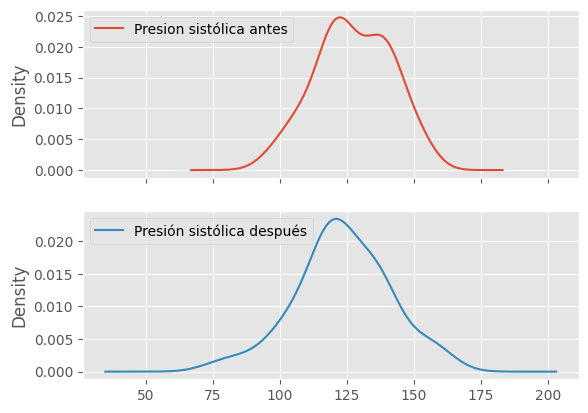

In [6]:
# Visualizar las funciones de densidad para ambas variables:
(df_hipertension
                .loc[df_hipertension['Grupo'] == 2]
                [['Presion sistólica antes', 'Presión sistólica después']]
                .plot.density(subplots=True)
);

### c)

**Indicar para cada una de las variables relacionadas con la medición 
de la presión sistólica que aparecen en el fichero el valor de los cuartiles 
y su significado y obtener el box- plot ( diagrama de cajas) 
correspondiente. Estudiar la presencia de valores atípicos.**

`Asumiendo que se me pregunta por las variables del grupo total en vez del grupo 2 solamente :`

Los valores de los cuartiles para las dos variables sobre la presión sistólica vienen dados por la tabla de abajo en la que 25%, 50%, y 75% representan Q1, Q2, y Q3, respectivamente. 

Q1 es el valor que deja a su izquierda el 25% de los datos. En el caso de la presión sistólica antes de la ingestión de la medicina, el Q1 es el valor 118. También indica que el 25% de los datos que deja por debajo tiene un valor menor o igual que 118, mientras que el 75% restante toma valores igual o mayor que 118.

Q2 corresponde con el valor que deja el 50% de los datos a su izquierda, y Q3, con el que deja el 75% de los datos a su izquierda.

In [7]:
# Crear df con los cuartiles para cada variable sobre hipertensión (utilizando datos de ambos grupos):
(df_hipertension
                [['Presion sistólica antes', 'Presión sistólica después']]
                # Crear summary statistics
                .describe()
                # Filtar por cuartiles
                .loc[['25%', '50%', '75%']]
)

,Presion sistólica antes,Presión sistólica después
25%,118.0,115.00
50%,125.0,120.00
75%,135.0,131.25


Se observa la presencia de 5 valores atípicos (más allá del 1,5 del rango intercuartílico) en la presión sistólica después de tomar el medicamento: 2 valores inusualmente grandes y 3 inusualmente pequeñas.

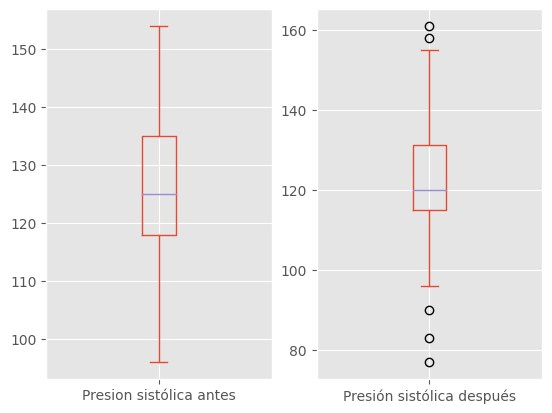

In [8]:
# Crear las diagramas de cajas para ambas variables:
(df_hipertension
                [['Presion sistólica antes', 'Presión sistólica después']]
                .plot.box(subplots=True)
);

In [9]:
# Dichos valores atípicos:
df_hipertension.loc[((df_hipertension['Presión sistólica después'] > (131.25 + 1.5*(131.25-115)))) | 
                    ((df_hipertension['Presión sistólica después'] < (115 - 1.5*(131.25-115))))]

,Grupo,Edad,Presion sistólica antes,Presión sistólica después,Colesterol total
42,2,76,151,158,246
61,2,50,153,161,179
65,2,81,105,83,187
67,2,68,121,90,184
80,2,45,100,77,190


### d)

**Estudiar la normalidad de los datos de las variables relacionadas con 
la medición de la presión sistólica.**

Observando las funciones de densidad, parece que la distribución de ambas variables se asemeja una normal, aunque la distribución de la presión después sea ligeramente asimétrica.

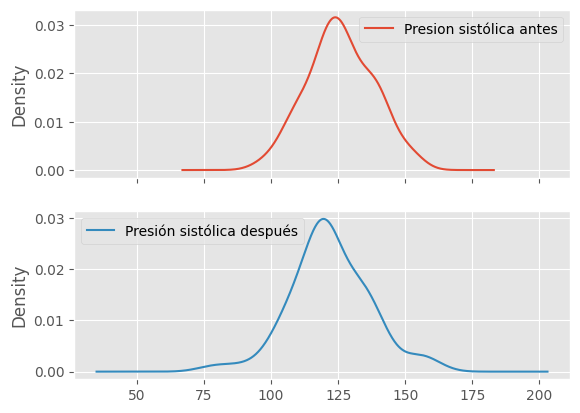

In [10]:
# Visualizar las funciones de densidad para ambas variables:
(df_hipertension
                [['Presion sistólica antes', 'Presión sistólica después']]
                .plot.density(subplots=True)
);

Basándonos en los QQ-plots, observamos que efectivamente la presión sistólica antes está normalmente distribuida. La gran mayoría de los cuantiles muestrales coinciden con los teóricos.

En el caso de la presión sistólica después no podemos estar tan seguros de que sea normal por la presencia varios valores atípicos tanto por la izquierda como por la derecha. No obstante, el test de Shapiro-Milk nos indica que podemos estar seguros a un 95% de nivel de confianza de que dicha variable tiene una distribución normal (H0) ya que el p-valor es mayor que el nivel de significación: 0.108 > 0.05.

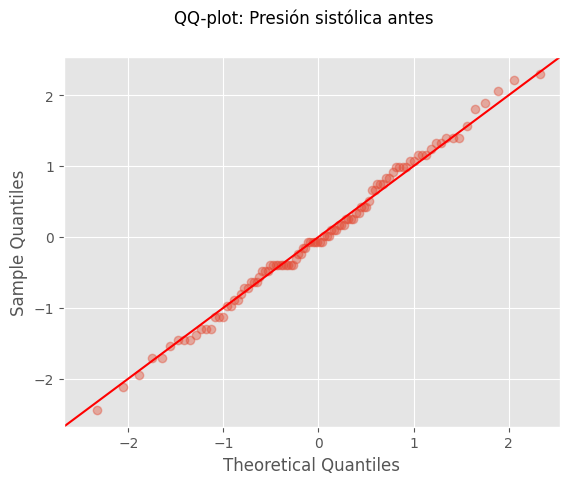

In [11]:
import statsmodels.api as sm

QQ_plot_antes = sm.qqplot(data=df_hipertension['Presion sistólica antes'],
          fit=True, 
          line='45',
          alpha= .4,
          )

QQ_plot_antes.suptitle('QQ-plot: Presión sistólica antes');

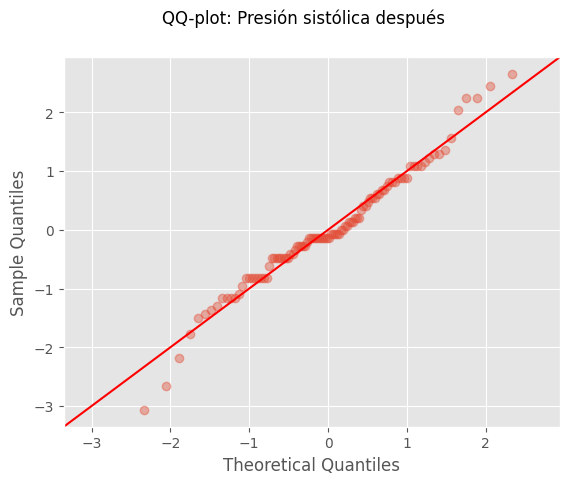

In [12]:
QQ_plot_desp = sm.qqplot(data=df_hipertension['Presión sistólica después'],
          fit=True, 
          line='45',
          alpha= .4,
          )

QQ_plot_desp.suptitle('QQ-plot: Presión sistólica después');

In [13]:
# Test de Shapiro-Milk para presión sistólica después.
_, pvalor = sp.stats.shapiro(df_hipertension['Presión sistólica después'])

print(f"El p-valor del test de Shapiro-Milk: {pvalor:.4f}.")

El p-valor del test de Shapiro-Milk: 0.1087.


## Ejercicio 2

**Con los datos del fichero anterior, se quiere estudiar la relación existente 
entre la presión sistólica después de la toma del medicamento y el 
colesterol total del paciente en los pacientes jóvenes ( grupo 1)**

### a)

**Estudiar la relación lineal existente entre estas dos variables de
estudio.**

Se observa una fuerte relación lineal positiva entre la presión sistológica después de tomar el medicamento y el nivel de colesterol total de los pacientes jóvenes mediante el gráfico de dispersión.

Esta correlación positiva es confirmada por el resultado de la correlación de Pearson, el cual da un resultado aproximado de 0.77, indicando una fuerte correlación lineal positive entre las dos variables.

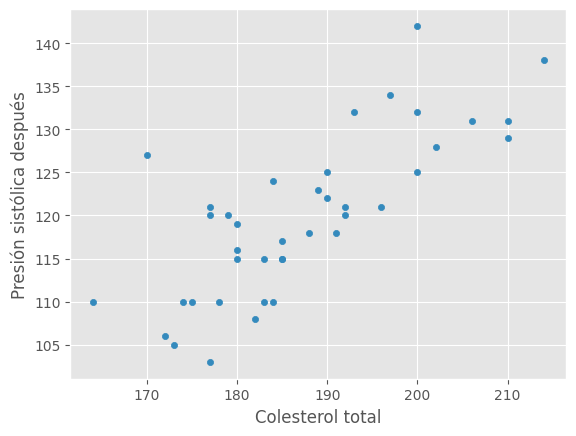

In [14]:
# Gráfica de dispersión entre la presión sistólica después y el colesterol total (grupo 1):
(df_hipertension
                # Filtrar por grupo 1
                .loc[df_hipertension['Grupo'] == 1]
                .plot.scatter(x='Colesterol total', y='Presión sistólica después')
);

In [15]:
# Coeficiente de correlación de Pearson entre la presión sistólica después y el colesterol total (grupo 1):
(df_hipertension
                # Filtrar por grupo 1 y las dos variables de interés
                .loc[df_hipertension['Grupo'] == 1, ['Presión sistólica después', 'Colesterol total']]
                # Correlación de Pearson
                .corr(method='pearson')
)

,Presión sistólica después,Colesterol total
Presión sistólica después,1.000000,0.767135
Colesterol total,0.767135,1.000000


### b)

**Obtener un modelo lineal que explica la presión sistólica del paciente
joven a los 60 minutos de ingerir el medicamento en función de su 
colesterol total y realizar la estimación para un paciente del grupo 1 
( joven) cuyo colesterol total es 105 mg/Dl**

Según los resultados de los parámetros de la regresión OLS, el modelo es el siguiente:

``Presión sistólica después (grupo 1) = 6,169 + 0,607*(Colesterol total)``

La estimación de un paciente joven cuyo colesterol total es 105 es igual a 6,169 + 0,607*105 = **69.904**.

In [16]:
import statsmodels.api as sm

# Definir nuestro variable dependiente e independiente
y = df_hipertension[df_hipertension['Grupo'] == 1]['Presión sistólica después']
x = df_hipertension[df_hipertension['Grupo'] == 1]['Colesterol total']

# Añadir una columna para el término constante
x = sm.add_constant(x)

# Crear el modelo lineal (OLS) 
modelo = sm.OLS(y, x)

# Ajustar el modelo
resultado = modelo.fit()

# Mostrar el resultado
print(resultado.summary())

                                OLS Regression Results                               
Dep. Variable:     Presión sistólica después   R-squared:                       0.588
Model:                                   OLS   Adj. R-squared:                  0.578
Method:                        Least Squares   F-statistic:                     54.34
Date:                       Tue, 31 Oct 2023   Prob (F-statistic):           7.76e-09
Time:                               00:34:52   Log-Likelihood:                -127.84
No. Observations:                         40   AIC:                             259.7
Df Residuals:                             38   BIC:                             263.1
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------

### c)

**¿Qué tanto por ciento de la presión sistólica del paciente joven a los 
60 minutos de ingerir el medicamento no queda explicado por el anterior
modelo? ¿Cómo podrías mejorar el modelo?**

El coeficiente de determinación (R^2) de una regresión OLS con una sola variable independiente es el coeficiente de correlación de Pearson elevado al cuadrado: 0,767^2 = **0,588**. Es decir, cerca del 59% de la variabilidad de la presión sistólica del paciente joven  después de una hora de ingerir el medicamento puede ser explicada por su nivel de colesterol total.

Por lo tanto el porcentaje restante es la variabilidad de la variable dependiente que no ha podido ser explicado por el modelo anterior: 1 - 0,588 = 0,412 (**41,2%**).

El modelo puede mejorar incluyendo otras variables predictoras de la presión sistólica como el sexo, peso corporal, cantidad de ejercicio físico, etc.

### d)

**Si aumentásemos el colesterol de un paciente en 5 mg/Dl ¿Qué
variación experimentaría su presión sistólica después de 60 minutos de 
ingerir el medicamento?**

``Presión sistólica después (grupo 1) = 6,169 + 0,607*(Colesterol total)``

El coeficiente 0,607 indica el valor de incremento de una unidad de colesterol en la presión sistólica después de 60 minutos de ingerir el medicamento en un paciente joven en promedio. Se obtiene calculado la derivada parcial de la presión sistólica después respecto al colesterol total.

Por lo tanto, si el colesterol total de un paciente joven se incrementa en 5, entonces la variación que experimentaría en su presión sistólica después de 60 minutos de ingerir el medicamento es de 0,607*5 = **3,035**.

## Ejercicio 3

### a)

**Se quiere estudiar si se puede admitir que la presión sistólica media 
en el momento de la ingestión de la población adulta (grupo 2) es 130
mm de Hg. Obtener el intervalo de confianza al 95% y al 99% para el
nivel medio de presión sistólica antes de la toma del medicamento en
el grupo de los adultos y posteriormente contesta a la cuestión
planteada con los resultados obtenidos o mediante un contraste de
hipótesis.**

H0: miu = 130
H1: miu != 130

Como la supuesta media poblacional de la presión sistólica antes en el grupo 2 (130) está contenida tanto en los intervalos de confianza al nivel 95 and 99%, no hay evidencias suficientes para determinar que la media poblacional sea significativamente diferente de 130 mm de Hg (a niveles de significación 0.05 y 0.01). Por lo tanto, se puede admitir que la media de la presión sistólica antes del grupo 2 sea 130 mm de Hg.

In [17]:
# Al parecer no existe funciones integradas en Python para calcular directamente intervalos de confianzas.
# Crear una función para calcular intervalos de confianza para la media usando t-distribution:
import scipy as sp
import numpy as np

def intervalo_confianza(datos, nivel_confianza=0.95):
    """Devuelve un mensaje con el intervalo de confianza de la media de la ``muestra`` dada y al ``nivel de confianza`` indicado.
    El nivel de confianza por defecto es del 0.95 (95%)."""

    t_statistic = np.abs(sp.stats.t.ppf((1 - nivel_confianza) / 2, df=len(datos) - 1))
    media = datos.mean()
    error_estandar = datos.std() / np.sqrt(len(datos))
    
    margen_error = t_statistic * error_estandar
    limite_inferior = media - margen_error
    limite_superior = media + margen_error
    
    print(f"La media muestral es {media:.3f} y el intervalo de confianza de '{datos.name}' al {nivel_confianza*100:.0f}% de confianza:[{limite_inferior:.3f}, {limite_superior:.3f}].")
    print(f"Este intervalo contiene las medias muestrales el {nivel_confianza*100}% de las veces.") 
    print(f"Por ello, hay un {nivel_confianza*100:.0f}% de confianza de que este intervalo contenga la media poblacional.")

In [18]:
# Intervalo de confianza al 95% de la media de la presión sistólica antes del grupo 2:
# Crear un dataframe únicamente para grupo 2 (adultos)
grupo2 = df_hipertension[df_hipertension['Grupo'] == 2]

intervalo_confianza(datos=grupo2['Presion sistólica antes'],
                    nivel_confianza=0.95)

La media muestral es 127.483 y el intervalo de confianza de 'Presion sistólica antes' al 95% de confianza:[123.895, 131.071].
Este intervalo contiene las medias muestrales el 95.0% de las veces.
Por ello, hay un 95% de confianza de que este intervalo contenga la media poblacional.


In [19]:
# Intervalo de confianza al 99% de la media:
intervalo_confianza(datos=grupo2['Presion sistólica antes'],
                    nivel_confianza=0.99)

La media muestral es 127.483 y el intervalo de confianza de 'Presion sistólica antes' al 99% de confianza:[122.711, 132.256].
Este intervalo contiene las medias muestrales el 99.0% de las veces.
Por ello, hay un 99% de confianza de que este intervalo contenga la media poblacional.


In [20]:
# Contraste de hipótesis una media:

# El primer elemento de la tupla es el estdístico t, el segundo es el pvalor
p_value_130 = sp.stats.ttest_1samp(grupo2['Presion sistólica antes'],
                                   130)[1]
p_value_130

# Por lo tanto no podemos rechazar h0: media poblacional es 130 (ni con nivel de confianza 99% ni 95%).

0.16568525745079007

### b)

**Obtener el intervalo de confianza al 95% para la diferencia de medias
en la presión sistólica entre adultos yjóvenes después de la ingestión 
del medicamento. ¿Se puede concluir que después de la ingesta del 
medicamento la presión sistólica media de la población es distinta 
dependiendo de la edad?**

H0: miu grupo 2 - miu grupo 2 = 0 <br />
H1: miu grupo 2 - miu grupo 2 != 0

Como 0 está contenido en el intervalo [-1.783, 8.883], no hay suficiente evidencias para afirmar que la diferencia de medias en la presión sistólica entre adultos y jóvenes después de la ingestión sea significativamente diferente al nivel de significación de 0.05.

In [21]:
# Crear un dataframe únicamente para grupo 1 (jóvenes)
grupo1 = df_hipertension[df_hipertension['Grupo'] == 1]

# Función para calcular intervalos de confianzas de diferencias de medias con distintas varianzas:
def intervalo_confianza_diff(datos1, datos2, nivel_confianza=0.95):
    
    t_statistic = np.abs(sp.stats.t.ppf((1 - nivel_confianza)/2, df=len(datos1) + len(datos2) - 2))
    diff_medias = datos1.mean() - datos2.mean()
    error_estandar = np.sqrt(datos1.var()/len(datos1) + datos2.var()/len(datos2)) 
    
    margen_error = t_statistic * error_estandar
    limite_inferior = diff_medias - margen_error
    limite_superior = diff_medias + margen_error
    
    print(f"La diferencia de medias muestral es {diff_medias:.3f} y el intervalo de confianza de la diferencia de medias entre '{datos1.name}' y '{datos2.name}' al {nivel_confianza*100:.0f}% de confianza:[{limite_inferior:.3f}, {limite_superior:.3f}].")
    print(f"Este intervalo contiene la diferencia de la medias muestrales el {nivel_confianza*100:.0f}% de las veces.") 
    print(f"Por ello, hay un {nivel_confianza*100:.0f}% de confianza de que este intervalo contenga la diferencia de medias poblacional.")

In [22]:
intervalo_confianza_diff(grupo2['Presión sistólica después'], 
                         grupo1['Presión sistólica después'], 
                         nivel_confianza=0.95)

La diferencia de medias muestral es 3.550 y el intervalo de confianza de la diferencia de medias entre 'Presión sistólica después' y 'Presión sistólica después' al 95% de confianza:[-1.783, 8.883].
Este intervalo contiene la diferencia de la medias muestrales el 95% de las veces.
Por ello, hay un 95% de confianza de que este intervalo contenga la diferencia de medias poblacional.


In [23]:
# test de diferencias de medias (2 muestras) con distintas varianzas (independientes):
pvalue_diff = sp.stats.ttest_ind(grupo2['Presión sistólica después'], 
                                 grupo1['Presión sistólica después'], 
                                 equal_var=False)[1]
pvalue_diff

# No podemos rechazar H0 al nivel de significación 0.05

0.18967318593745108

### c)

**Se quiere estudiar la proporción de la población con una presión 
sistólica inicial igual o superior a 130 mm de Hg (prehipertensión). A 
partir de la muestra del fichero (tomando todos los datos de presión 
sistólica antes de la toma del medicamento) obtener un intervalo de 
confianza al 99% de la proporción de la población con hipertensión y 
contrastar la hipótesis que el porcentaje de la población con presión 
sistólica superior o igual a 130 mm de Hg es 0,30 con nivel de
significación del 5%.**

X = población con una presión sistólica antes >= 130 mm de Hg.

H0: p = 0.3 <br />
H1: p != 0.3

El intervalo de confianza al 99% es [0.3, 0.473].

El pvalor del contraste de proporción frente a p = 0.3 es mayor que el nivel de significación del 5%: 0.2945 > 0.05. Por lo tanto, no hay suficiente evidencias para rechazar la H0. Se puede afirmar con un nivel de confianza del 95% que el porcentaje de pacientes con hipertensión es del 30 por ciento. 

In [24]:
# Crear un dataframe solamente para pacientes con presión sistólica mayor o igual que 130
presion_mayor130 = df_hipertension[df_hipertension['Presion sistólica antes'] >= 130]
presion_mayor130

,Grupo,Edad,Presion sistólica antes,Presión sistólica después,Colesterol total
4,1,35,131,132,200
11,1,24,131,128,202
14,1,25,134,131,206
21,1,33,142,138,214
22,1,31,138,129,210
23,1,29,139,125,200
28,1,21,131,142,200
32,1,28,130,121,196
33,1,35,137,131,210
42,2,76,151,158,246


In [25]:
# Crear intervalo de confianza al 99% para proporción de pacientes con presión antes mayor o igual que 130:
nivel_confianza = 0.99

z_statistic = np.abs(sp.stats.norm.ppf((1 - nivel_confianza)/2))
num_total = len(df_hipertension['Presion sistólica antes'])
num_exitos = len(presion_mayor130)
p_muestral = num_exitos / num_total
des_tipica = np.sqrt((p_muestral*(1 - p_muestral))/num_total)

lim_inferior = p_muestral - z_statistic * des_tipica
lim_superior = p_muestral + z_statistic * des_tipica

print(f"El intervalo de confianza:[{0.3}, {lim_superior:.3f}]")

El intervalo de confianza:[0.3, 0.473]


In [26]:
# Contrastar proporciones al 95%: p0 = 0,3
pvalue_prop = sm.stats.proportions_ztest(count=num_exitos, 
                                         nobs= num_total, 
                                         value=0.3)[1]
pvalue_prop

0.29450739368011025

### d) VOLUNTARIO

**Por último, se quiere estudiar la eficacia del 
medicamento en la población adulta. ¿Existe variación significativa de 
la presión sistólica después de la toma del medicamento en la 
población del grupo 2? Plantea el correspondiente contraste de
hipótesis considerando un nivel de significación del 5%. Ayuda: 
Para contestar a la pregunta has de considerar la series de datos 
obtenidas a partir de las diferencias entre la presión sistólica antes de 
la toma y la presión sistólica al cabode 60 minutos en el grupo de los 
adultos (contraste de muestras emparejadas).**

H0: miu despues - miu antes = 0 <br />
H1: miu despues - miu antes != 0

El pvalor resultante de la contraste de hipótesis emparejada (0.00036) es menor que 0.05, lo cual sugiere que el medicamento ha tenido un effecto significativo en la reducción de presión sistólica en los adultos (grupo 2); la reducción de promedio es de 4.033 mm de Hg.

In [27]:
# Diferencia de medias grupo 2:
grupo2['Presión sistólica después'].mean() - grupo2['Presion sistólica antes'].mean()

-4.033333333333331

In [28]:
# Contraste de hipótesis emparejada (related/paired) con alpha = 0.05:
pvalue_paired = sp.stats.ttest_rel(grupo2['Presion sistólica antes'], 
                                   grupo2['Presión sistólica después'])[1]
pvalue_paired

0.00036311775489927307